# Project_ML

## Business understanding

### Problem statement
Breast cancer is one of the most common spread and Dangerous cancers worldwide . and the process of manual diagnosis and waiting for the Professional to analyze, while its not 100% effective , can be time consuming and subject to human error . thats why there is an essential need to help the medical Equipment by providing accurate and reliable decision support that assist and help classify the tumors detected as benign or malignant.
To address this need,machine Learning has been applied to the Wisconsin Diagnostic Breast Cancer (WDBC) dataset for breast cancer classification. specifically , the recent case study by Department of Computer Science Adamson University Manila, Philippines where researchers used GRU-SVM, Linear Regression, Multilayer Perceptron (MLP) and others. by measuring and acheiving an acuracy test we can tell that they achieved excelent results in telling benign and malignant tumors apart . and as we know this technology isnt to work alone . its designed as smart assistant for professionals to make their work faster. the main users are : pathologists , oncologists , gynaecologist

### Storytelling bos:
Ilef find that she has a mass in her breast so she decided to check with an oncologist, he asked her to do an fna test ,after the result he presented to her te new ai system 'ena healthy ' analysed her test and find out if it's a benign or malignant tumor,ilef panicked, she was afraid of  having a malignant tumor but the doctor calmed her and informed her that it is only an early warning because the system could also tell him the stage of tumor ,and means that they have to extract the mass by a surgery and then they will analyse it. So she booked an appointment with a surgent oncologist. Then a pathologists analyses the mass and 'ena healthy' told them if there is a risk in the future or not. After that she goes to gynaecologist to do frequent check ups to know the risk in the future.  
 
#### BOS:
1) Identify the type of tumor (benign or malignant)
2) Identify the stage of tumor
3) Identify the risk in the future
### DSOS:
1) dso1 :analyze FNA sample features to instantly diagnose a tumor as Benign or Malignant.
2) Predict the cancer stage (I, II, III, or IV) by examining the morphology of biopsy cells
3) dso 3 : estimate the probability of a malignant breast cancer in the future .



| Model name       | List of variables used (30 features) | List of parameters and hyperparameters |
|------------------|---------------------------------------|------------------------------------------|
| **Linear Regression** | `radius_mean`<br>`texture_mean`<br>`perimeter_mean`<br>`area_mean`<br>`smoothness_mean`<br>`compactness_mean`<br>`concavity_mean`<br>`concave points_mean`<br>`symmetry_mean`<br>`fractal_dimension_mean`<br>`radius_se`<br>`texture_se`<br>`perimeter_se`<br>`area_se`<br>`smoothness_se`<br>`compactness_se`<br>`concavity_se`<br>`concave points_se`<br>`symmetry_se`<br>`fractal_dimension_se`<br>`radius_worst`<br>`texture_worst`<br>`perimeter_worst`<br>`area_worst`<br>`smoothness_worst`<br>`compactness_worst`<br>`concavity_worst`<br>`concave points_worst`<br>`symmetry_worst`<br>`fractal_dimension_worst` | • Batch size: 128<br>• Epochs: 3000<br>• Learning rate: 1e-3<br>• Optimizer: Stochastic Gradient Descent (SGD)<br>• Loss function: Mean Squared Error (MSE)<br>• Classification threshold: 0.5 |
### Explanation
#### List of variables used (30 features)
These are the 30 measurements taken from the breast tumor sample using FNA.
They belong to 3 groups:

* Mean values
* Standard error (SE)
* Worst (largest) values

And for each group, we have 10 basic features:
* radius
* texture
* perimeter
* area
* smoothness
* compactness
* concavity
* concave points
* symmetry
* fractal_dimension

So the model uses all 30 features to make predictions.
#### Parameters and Hyperparameters
These are the settings used to train the model:
##### Batch size: 128
→ The model learned using 128 samples at a time.
##### Epochs: 3000
→ The entire dataset was passed 3000 times through the model during training.
##### Learning rate: 1e-3
→ Controls how fast the model updates the weights.
→ 1e-3 means 0.001.
##### Optimizer: SGD (Stochastic Gradient Descent)
→ Method used to minimize the error and adjust the model’s parameters.
##### Loss function: MSE (Mean Squared Error)
→ Measures how far the predictions are from the true values.
##### Classification threshold: 0.5
→ If the model output is ≥ 0.5 → tumor is predicted Malignant.
→ If the output is < 0.5 → tumor is predicted Benign.

# Data understanding

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.df = pd.read_excel("C:\\4ds9\\s1\\ml\\mini projet\\notebook\\data.xlsx")

# Cleaning: drop unnecessary columns
df = df.drop(columns=['id'], errors='ignore')                    
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 1. Statistiques descriptives
print(df.describe())
print("Shape après nettoyage :", df.shape)
print("Colonnes :", df.columns.tolist())
print("\n5 premières lignes  :")
print(df.head(), "\n")

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [5]:
# 2. Qualité des données
print("\nMissing Values Total:", df.isnull().sum().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)


Missing Values Total: 0

Duplicates: 0

Data Types:
 diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
c

In [6]:
# Check for anomalies (negative values in numeric features)
numeric_cols = df.select_dtypes(include=np.number).columns
anomalies = (df[numeric_cols] < 0).sum().sum()
print("\nAnomalies (negative values):", anomalies)


Anomalies (negative values): 0


In [7]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize=True).round(3) * 100)

diagnosis
0    357
1    212
Name: count, dtype: int64
diagnosis
0    62.7
1    37.3
Name: proportion, dtype: float64


In [8]:
# 3. Séparation features / target
X = df.drop('diagnosis', axis=1)      # les 30 features
y = df['diagnosis']

In [9]:
# 5. Statistiques descriptives
print("\nStatistiques descriptives (comme dans le papier) :")
display(X.describe().T.round(4))


Statistiques descriptives (comme dans le papier) :


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.1273,3.5240,6.9810,11.7000,13.3700,15.7800,28.1100
texture_mean,569.0,19.2896,4.3010,9.7100,16.1700,18.8400,21.8000,39.2800
perimeter_mean,569.0,91.9690,24.2990,43.7900,75.1700,86.2400,104.1000,188.5000
area_mean,569.0,654.8891,351.9141,143.5000,420.3000,551.1000,782.7000,2501.0000
smoothness_mean,569.0,0.0964,0.0141,0.0526,0.0864,0.0959,0.1053,0.1634
compactness_mean,569.0,0.1043,0.0528,0.0194,0.0649,0.0926,0.1304,0.3454
concavity_mean,569.0,0.0888,0.0797,0.0000,0.0296,0.0615,0.1307,0.4268
concave points_mean,569.0,0.0489,0.0388,0.0000,0.0203,0.0335,0.0740,0.2012
symmetry_mean,569.0,0.1812,0.0274,0.1060,0.1619,0.1792,0.1957,0.3040
fractal_dimension_mean,569.0,0.0628,0.0071,0.0500,0.0577,0.0615,0.0661,0.0974


C:\Users\tasni\AppData\Local\Temp\ipykernel_99488\2967565972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette=['lightblue','crimson'])


([<matplotlib.axis.XTick at 0x1af372a8f40>,
 [Text(0, 0, 'Bénin (357)'), Text(1, 0, 'Malin (212)')])

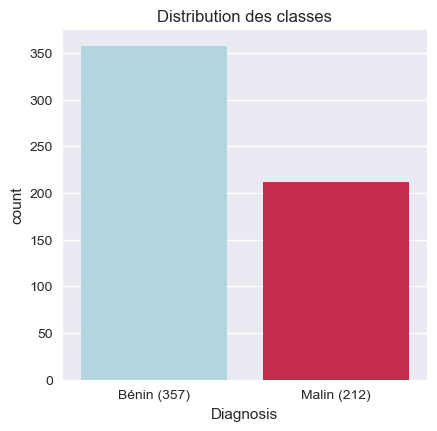

In [10]:
# 7. Visualisations
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(16, 10))
# 7.1 Distribution des classes – VERSION 100 % COMPATIBLE
plt.subplot(2,3,1)
sns.countplot(data=df, x='diagnosis', palette=['lightblue','crimson'])
plt.title('Distribution des classes')
plt.xlabel('Diagnosis')
plt.xticks([0,1], ['Bénin (357)', 'Malin (212)'])

C:\Users\tasni\AppData\Local\Temp\ipykernel_99488\4181843405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrs.values, y=corrs.index, palette='viridis')


Text(0.5, 0, 'Corrélation absolue')

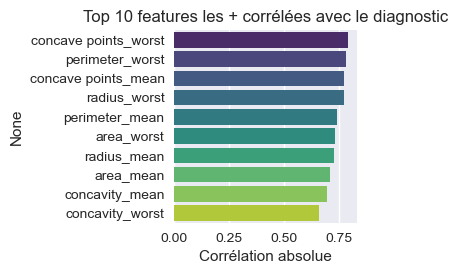

In [11]:
# 7.3 Top 10 features les plus corrélées avec la cible
plt.subplot(2, 3, 5)
corrs = df.corr()['diagnosis'].abs().sort_values(ascending=False)[1:11]
sns.barplot(x=corrs.values, y=corrs.index, palette='viridis')
plt.title('Top 10 features les + corrélées avec le diagnostic')
plt.xlabel('Corrélation absolue')

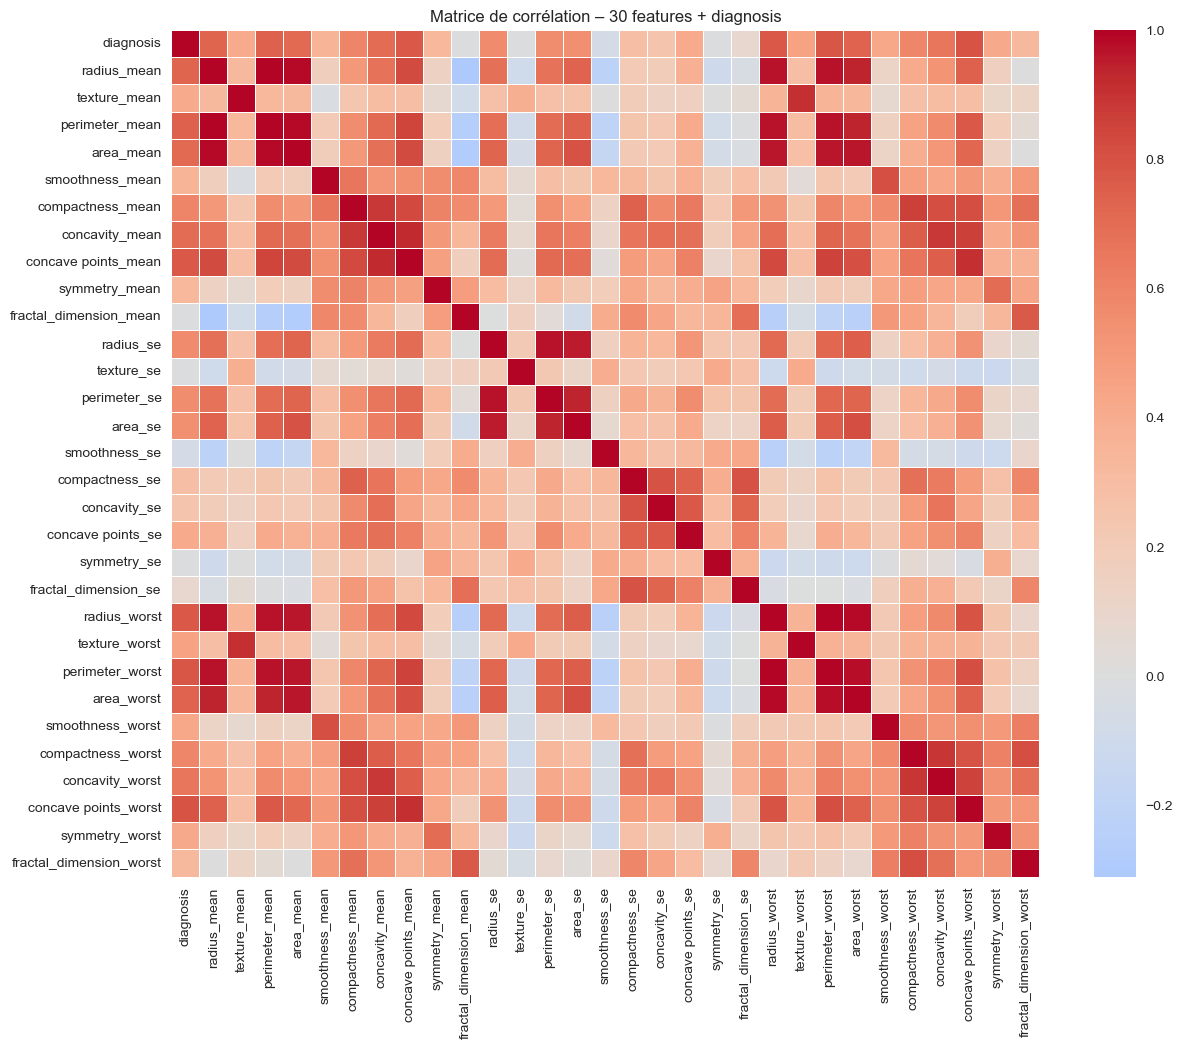

In [12]:
plt.figure(figsize=(14, 11))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matrice de corrélation – 30 features + diagnosis')
plt.show()